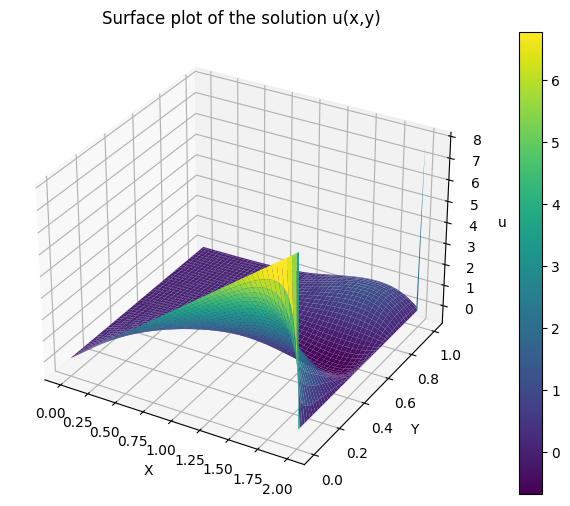

(838, 0.0009986723334465264)

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the number of grid points and the convergence criterion for a much smaller grid
N = 100
epsilon = 1e-3  # Relaxing convergence criterion

# Initialize the grid
u = np.zeros((N, N))
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Apply boundary conditions
u[0, :] = beta * y  # u(x=0) = beta * y
u[-1, :] = beta * y  # u(x=2) = beta * y
# u(y=0) is already initialized to 0

# Precompute the constant f(x,y) for x >= 1
f = np.zeros((N, N))
for j in range(N):
    for i in range(N//2, N):  # Start at x=1, which is halfway across the grid
        f[j, i] = 40 * np.sin(alpha * y[j]) * (1 - x[i])

# Perform Gauss-Seidel iteration
max_diff = np.inf
iterations = 0

while max_diff > epsilon:
    max_diff = 0
    for j in range(1, N-1):
        for i in range(1, N-1):
            u_old = u[j, i]
            # Apply the Gauss-Seidel update
            if x[i] < 1:
                u[j, i] = 0.25 * (u[j, i+1] + u[j, i-1] + u[j+1, i] + u[j-1, i])
            else:
                u[j, i] = 0.25 * (u[j, i+1] + u[j, i-1] + u[j+1, i] + u[j-1, i] - dx**2 * f[j, i])
            
            # Compute the change and track the maximum
            diff = abs(u[j, i] - u_old)
            max_diff = max(max_diff, diff)

    # Apply the Neumann boundary condition at y=1
    for i in range(1, N-1):
        u[N-1, i] = u[N-2, i] - dy * gamma * u[N-2, i]
    
    iterations += 1

# Create the meshgrid for plotting
X, Y = np.meshgrid(x, y)

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u')
ax.set_title('Surface plot of the solution u(x,y)')
plt.colorbar(surf)
plt.show()

# Return the number of iterations and the maximum difference for output
iterations, max_diff
